# Brauer 2008 SEIR model

The following infectious disease spread model is based on the SEIR model from Brauer 2008:

$S(t)$ is the number of individuals who are susceptible to the disease, that is,
who are not (yet) infected at time $t$.
$I(t)$ is the number of infected individuals, assumed infectious and able to spread
the disease by contact with susceptibles.
$R(t)$ is the number of individuals who have been infected and then removed from the
possibility of being infected again or of spreading infection.
$E(t)$ is the number of individuals who have been exposed, but are not infectious yet.

Diff eq's:
    $$ S'=-\beta SI $$
    $$ E'=\beta SI -\kappa E $$
    $$ I'=\kappa E -\alpha I $$
    $$ R'=\alpha I $$
    
Model assumptions:

    (1) An average member of the population makes contact sufficient to transmit
     infection with betaN others per unit time, where N represents total
     population size (mass action incidence).
     
    (2) Infectives leave the infective class at a rate alphaI per unit time.
    
    (3) There is no entry into or departure from the population, except possibly
     through death from the disease.
     
    (4) Incorporate an exponentially distributed exposed period with mean exposed period 1/kappa
    
$R_0$ is the basic reproduction number, which is $\frac{\beta S(0)}{\alpha}$

### Importing Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import math
import pandas as pd

### Data Collection for SEIR model

In [3]:
def BrauerSEIR(N=1000, alpha=0.04, betaprime=0.25, filename="SEIR1kalpha04beta25.csv", plotname="SEIR1kalpha04beta25.png"):
    ''' input population size, alpha value, filename
    returns plot and saves data as dataframe under filename and plot unde plotname
    MAKE SURE THAT FILENAME AND PLOTNAME ENTRIES INCLUDE FILE FORMAT
    '''
    # time step (days)
    dt = 0.01
    # total time
    tottime = 365
    # initial percent removed
    pr = 0
    # initial percent exposed
    pe = 0
    # initial percent infected
    pi = 0.02
    # initial percent susceptible
    ps = 1 - pr - pe - pi
    
    niter = int(math.ceil(tottime/dt))
    t = np.arange(0, tottime, dt)   
    S = np.zeros(niter)
    E = np.zeros(niter)
    I = np.zeros(niter)
    R = np.zeros(niter)
    
    S[0] = ps*N
    E[0] = pe*N
    I[0] = pi*N
    R[0] = pr*N
    
    beta = betaprime/N
    
    kappa = 0.2
    
    R0 = beta*S[0]/alpha

    for j in range(niter-1):
        dSdt=-(beta)*S[j]*I[j]
        dEdt=beta*S[j]*I[j]-kappa*E[j]
        dIdt=kappa*E[j]-alpha*I[j]
        dRdt=alpha*I[j]
        S[j+1] = S[j] + dt*dSdt
        E[j+1] = E[j] + dt*dEdt
        I[j+1] = I[j] + dt*dIdt
        R[j+1] = R[j] + dt*dRdt
    N=S+E+I+R
    
    plt.plot(t, S, 'k', label = 'susceptible')
    plt.plot(t, E, 'g', label = 'exposed')
    plt.plot(t, I, 'm', label = 'infected')
    plt.plot(t, R, 'b', label = 'recovered')
    plt.plot(t, N, 'y', label = 'total')
    plt.gca().legend(('susceptible', 'exposed', 'infected','recovered','total'))
    plt.title('Brauer 2008 SEIR model R0 = ' + str(R0.round(4)))
    plt.xlabel('days since 2 percent of population infected')
    plt.ylabel('population')
    plt.savefig(plotname)
    plt.show()
    
    df = pd.DataFrame({'days':t, 'infected':I, 'exposed':E, 'susceptible':S,
                   'recovered':R, 'total':N})
    df.to_csv(filename)
    
    return plt.show()

SEIR1kalpha04beta25:

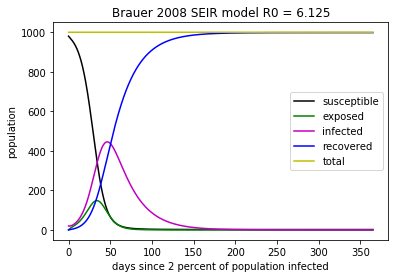

In [4]:
BrauerSEIR()

SEIR1kalpha07beta25:

In [ ]:
BrauerSEIR(1000, 0.07, 0.25)